**Introduction:**

In this project, the goal is to classify different physical activities (e.g., walking, climbing stairs) from tri-axial smartphone accelerometer data as accurately as possible. Different activities have been numbered with integers. We use the following encoding: 1 = standing, 2 = walking, 3 = stairs down, 4 = stairs up.

**Training Datasets:**

train_time_series.csv
train_labels.csv
The first file, train_time_series.csv, contains the raw accelerometer data, which has been collected using the Beiwe research platform, and it has the following format: timestamp, UTC time, accuracy, x, y, z. The timestamp column is used as time variable; the last three columns, here labeled x, y, and z, correspond to measurements of linear acceleration along each of the three orthogonal axes. The second file train_labels.csv has the following format: timestamp, UTC time, label. Because the accelerometers are sampled at high frequency, the labels in train_labels.csv are only provided for every 10th observation in train_time_series.csv.

**Test Datasets:**

test_time_series.csv
test_labels.csv
The file test_time_series.csv has the same format as the file train_time_series.csv and the data is unseen by the training and is for testing the prediction accuracy. An extra column label will be added based on the given x, y, z test data.

**Key Steps:**
    
    Import all necessary modules and read in all datasets with read_csv method;
Add one column label to train_time_series with the corresponding labels from train_labels using timestamp as time variable;
Define covariates x, y, z and outcome label from train_time_series;
Instantiate all desired classifiers;
Fit the models and determine the cross-validated accuracy for logistic and random forest models and pick the more accurate model;
Add one predicted column label to test_time_series;
Replace the NaN in column label with corresponding labels from test_time_series in the test_labels dataframe.
Run a k-nearest neighbors classifier and repeat step 6 and 7 and test the classification accuracy in Submission and identify knn is the most accurate model.
Write test_labels to csv file.
II. Methods: Logistic Regression, Random Forest Classifier, K-Nearest Neighbors Classifier
The process will be shown in the following cells. The data cleaning techniques include dict( ), zip( ), and dropna( ) methods. Data exploration and visualization is implemented with matplotlib.pyplot. The output plot will show how each model performs in terms of classification accuracy. Finally we will adopt the model that presents higher accuracy scores.

**Conclusion:**

The project tests the prediction accuracty of three different classification models, namely logistic regression, random forest classifier and k-nearest neighbors classifier, on the data of tri-axial smartphone accelerometer. According to the plot shown, the random forest classifier performs better than the logistic classifier. Furthermore, by testing the k-nearest neighbors calssifier in the submission, we obtained 1% more accurate prediction. Therefore, the final submission uses the k-nearest neighbors classifier result.

In [12]:
#Step 1: Import all necessary modules and read in all datasets with read_csv method
import pandas as pd
import time
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)

In [13]:
train_label = pd.read_csv("train_labels.csv")

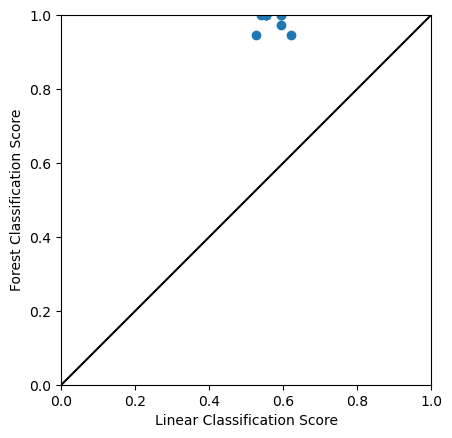

--- 73.27549910545349 seconds ---


In [14]:
start_time = time.time()

train_label = pd.read_csv("train_labels.csv")
train_time_series = pd.read_csv("train_time_series.csv")
test_time_series = pd.read_csv("test_time_series.csv")
test_label = pd.read_csv("test_labels.csv")

#Step 2: Add one column label to train_time_series with the corresponding labels from train_labels using timestamp 
# as time variable;

dict_label = dict(zip(train_label['timestamp'], train_label['label']))
train_time_series["label"] = train_time_series.timestamp.map(dict_label)
# Drop the NaN rows in train_time_series dataframe
train_time_series.dropna(how="any", inplace =True)


#Step 3: Define covariates x, y, z and outcome label from train_time_series
classification_target = 'label'
classification_outcome = train_time_series[classification_target]
all_covariates = ["x", "y", "z"]
covariates = train_time_series[all_covariates]

#Step 4: Instantiate all desired classifiers
logistic_regression = LogisticRegression()
forest_classifier = RandomForestClassifier(max_depth=5, random_state=0)


#Step 5: Fit the models and determine the cross-validated accuracy for logistic and random forest models and pick 
# the more accurate model, which is Random Forest Classifier in this case

def accuracy(estimator, X, y):
    reg = estimator.fit(X, y)
    predictions = reg.predict(X)
    return accuracy_score(y, predictions)

logistic_regression_scores = cross_val_score(logistic_regression, covariates, classification_outcome, cv =10, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv =10, scoring=accuracy)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Classification Score")
plt.ylabel("Forest Classification Score")

# Show the plot.
plt.show()
#Step 6: Add one predicted column label to test_time_series

forest_classifier.fit(covariates, classification_outcome)
test_time_series['label'] = forest_classifier.predict(test_time_series[all_covariates])
test_time_series['label'] = test_time_series['label'].astype('int64')


#Step 7: Replace the NaN in column label with corresponding labels from test_time_series in the test_labels dataframe

dict_test_label = dict(zip(test_time_series['timestamp'], test_time_series['label']))
test_label['label'] = test_time_series.timestamp.map(dict_test_label)


#Step 8: Run a k-nearest neighbors classifier and repeat step 6 and 7 and test the classification accuracy in Submission and identify knn is the most accurate model.

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(covariates, classification_outcome)
test_time_series['label'] = knn.predict(test_time_series[all_covariates])
test_time_series['label'] = test_time_series['label'].astype('int64')

dict_test_label = dict(zip(test_time_series['timestamp'], test_time_series['label']))
test_label['label'] = test_time_series.timestamp.map(dict_test_label)

#Step 9: Write test_labels to csv file.

test_label.to_csv("test_label_final.csv")

print("--- %s seconds ---" % (time.time() - start_time))